# Integration of SIR model for epidemic

## Based on  W. O. Kermack and A. G. McKendrick model (https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease)



Wendson Barbosa  
Postdoctoral Researcher  
Department of Physics   
Physics Research Building Room 4128  
191 W. Woodruff Ave, Columbus, OH 43210  
Physics Department phone: 614-292-5713   
desabarbosa.1@osu.edu  

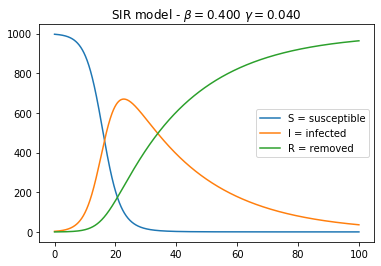

In [48]:
import matplotlib.pyplot as plt 
import numpy as np  
import scipy
from scipy import integrate
from scipy.signal import argrelextrema

#SIR model
def SIR(t,y):
    
    dS_dt = -beta*y[0]*y[1]/(y[0]+y[1]+y[2]) 
    dI_dt = beta*y[0]*y[1]/(y[0]+y[1]+y[2])  - gamma*y[1]
    dR_dt = gamma*y[1]
    
    return[dS_dt,dI_dt,dR_dt]

# S = y[0] ==> Number of individuals not yet infected
# I = y[1] ==> Number of individuals infected
# R = y[2] ==> Number of individuals recovered or killed by the disease 

#Parameters
beta= 0.4   # Infection Rate
gamma= 0.04 # Recovery Rate

y0 = [997,3,0] # Array of initial conditions S0, I0, R0

#Integration Function for parameter passing
def solution (beta,gamma):
    return scipy.integrate.solve_ivp(SIR, (0,100), y0, max_step = 0.05, method='RK45')

SIR_solution = solution(beta,gamma)

plt.plot(SIR_solution.t, SIR_solution.y[0], label = "S = susceptible")
plt.plot(SIR_solution.t, SIR_solution.y[1], label = "I = infected")
plt.plot(SIR_solution.t, SIR_solution.y[2], label = "R = removed")
plt.legend()
plt.title ("SIR model - $\\beta=$%.3f $\\gamma=$%.3f" % (beta,gamma))
plt.show()


In [86]:
# Parameters Variation

Peak = []
Complete_Solution = []
beta_array = []

#Varying beta from 0.2 to 1.0
for beta in np.arange(0.2,1.1,0.1):
    
    Peak_beta = []
    beta_array.append(beta)
    Complete_Solution_beta = []
    gamma_array = []
    
    #Varying gamma from 0.01 to 0.1
    for gamma in np.arange(0.01,0.11,0.01):
        
        #Solution for each (beta,gamma)
        SIR_solution = solution(beta,gamma) 
        Complete_Solution_beta.append(SIR_solution)
        #Peak for each solution
        I_max = SIR_solution.y[1][argrelextrema(SIR_solution.y[1], np.greater)[0]] # get first maximum
        Peak_beta.append(I_max)
        
        gamma_array.append(gamma)
    
    Peak.append(Peak_beta)
    Complete_Solution.append(Complete_Solution_beta)

Peak = np.hstack(Peak) #Array manipulation for plotting

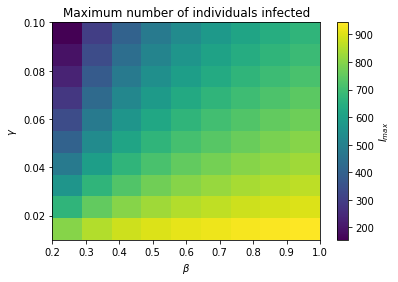

In [99]:
#Plot a colormap for maximum number of individuals infected   
plt.imshow(Peak,aspect='auto',extent = [0.2,1,0.1,0.01])#extent=[0.01,0.1,1,0.2])
plt.colorbar(label="$I_{max}$")
plt.title("Maximum number of individuals infected")
plt.xlabel("$\\beta$")
plt.ylabel("$\\gamma$")
plt.ylim(0.01,0.1)
plt.show()

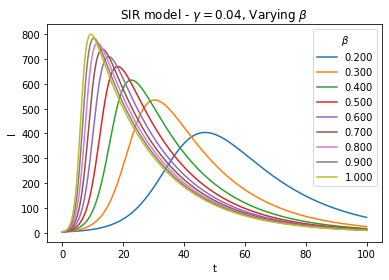

In [93]:
#Plots for gamma = 0.04 (second index=4 in the "Complete_Solutio" array), varying beta ==> Flattering the curve
for i in range (len(Complete_Solution)):
    plt.plot(Complete_Solution[i][4].t, Complete_Solution[i][4].y[1], label = "%.3f" % beta_array[i])
plt.legend(title="$\\beta$")
plt.title ("SIR model - $\\gamma=$0.04, Varying $\\beta$" )
plt.xlabel("t")
plt.ylabel("I")
plt.show()